In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore
import seaborn as sns

In [2]:
data = pd.read_csv('/content/dataset_olympics.csv')

In [3]:
data

ID                            Name Sex   Age  Height  Weight  \
0          1                       A Dijiang   M  24.0   180.0    80.0   
1          2                        A Lamusi   M  23.0   170.0    60.0   
2          3             Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3          4            Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4          5        Christine Jacoba Aaftink   F  21.0   185.0    82.0   
...      ...                             ...  ..   ...     ...     ...   
69995  35656              Stuart Fitzsimmons   M  19.0     NaN     NaN   
69996  35656              Stuart Fitzsimmons   M  19.0     NaN     NaN   
69997  35657  David Thomas "Dave" Fitzsimons   M  26.0   170.0    65.0   
69998  35657  David Thomas "Dave" Fitzsimons   M  30.0   170.0    65.0   
69999  35658                    Marek Fiurek   M  23.0   180.0    68.0   

                 Team  NOC        Games  Year  Season       City  \
0               China  CHN  1992 Summer  1992  Summer  Barcelona   
1               China  CHN  2012 Summer  2012  Summer     London   
2             Denmark  DEN  1920 Summer  1920  Summer  Antwerpen   
3      Denmark/Sweden  DEN  1900 Summer  1900  Summer      Paris   
4         Netherlands  NED  1988 Winter  1988  Winter    Calgary   
...               ...  ...          ...   ...     ...        ...   
69995   Great Britain  GBR  1976 Winter  1976  Winter  Innsbruck   
69996   Great Britain  GBR  1976 Winter  1976  Winter  Innsbruck   
69997       Australia  AUS  1976 Summer  1976  Summer   Montreal   
69998       Australia  AUS  1980 Summer  1980  Summer     Moskva   
69999  Czech Republic  CZE  1998 Winter  1998  Winter     Nagano   

                 Sport                             Event Medal  
0           Basketball       Basketball Men's Basketball   NaN  
1                 Judo      Judo Men's Extra-Lightweight   NaN  
2             Football           Football Men's Football   NaN  
3           Tug-Of-War       Tug-Of-War Men's Tug-Of-War  Gold  
4        Speed Skating  Speed Skating Women's 500 metres   NaN  
...                ...                               ...   ...  
69995    Alpine Skiing  Alpine Skiing Men's Giant Slalom   NaN  
69996    Alpine Skiing        Alpine Skiing Men's Slalom   NaN  
69997        Athletics     Athletics Men's 10,000 metres   NaN  
69998        Athletics      Athletics Men's 5,000 metres   NaN  
69999  Nordic Combined        Nordic Combined Men's Team   NaN  

[70000 rows x 15 columns]

In [4]:
# Drop the first column
data = data.drop(data.columns[0], axis=1)

In [5]:
data.head


<bound method NDFrame.head of                                  Name Sex   Age  Height  Weight  \
0                           A Dijiang   M  24.0   180.0    80.0   
1                            A Lamusi   M  23.0   170.0    60.0   
2                 Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3                Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4            Christine Jacoba Aaftink   F  21.0   185.0    82.0   
...                               ...  ..   ...     ...     ...   
69995              Stuart Fitzsimmons   M  19.0     NaN     NaN   
69996              Stuart Fitzsimmons   M  19.0     NaN     NaN   
69997  David Thomas "Dave" Fitzsimons   M  26.0   170.0    65.0   
69998  David Thomas "Dave" Fitzsimons   M  30.0   170.0    65.0   
69999                    Marek Fiurek   M  23.0   180.0    68.0   

                 Team  NOC        Games  Year  Season       City  \
0               China  CHN  1992 Summer  1992  Summer  Barcelona   
1               China  CHN  2

Check for missing values

In [6]:
# Check for missing values in each column
missing_values = data.isna().sum()

# Display columns with missing values and their respective counts
columns_with_missing_values = missing_values[missing_values > 0]
if not columns_with_missing_values.empty:
    print("Columns with missing values and their counts:")
    print(columns_with_missing_values)
else:
    print("No missing values found in the dataset.")


Columns with missing values and their counts:
Age        2732
Height    16254
Weight    17101
Medal     60310
dtype: int64


Fill missing values in Medal

In [7]:
#Fill missing values in 'Medal' with a specific label
data['Medal'].fillna('No Medal', inplace=True)

Remove missing values in Age, Height, and Weight

In [8]:
# Display the number of rows before removing missing values
print("\nNumber of rows before removing missing values:", len(data))

# Remove rows with missing values in 'Age', 'Height', and 'Weight' and keep the dataset name as 'data'
data.dropna(subset=['Age', 'Height', 'Weight'], inplace=True)

# Display the number of rows after removing missing values
print("Number of rows after removing missing values:", len(data))



Number of rows before removing missing values: 70000
Number of rows after removing missing values: 52266


Remove duplicates


In [9]:
# Check for duplicate rows
duplicate_rows = data[data.duplicated()]

if not duplicate_rows.empty:
    print("Duplicate rows found:")
    print(duplicate_rows)

    # Drop the duplicate rows
    data = data.drop_duplicates()

    print("Deleted the duplicate rows.")
else:
    print("No duplicate rows found in the dataset.")

No duplicate rows found in the dataset.


Remove outliers

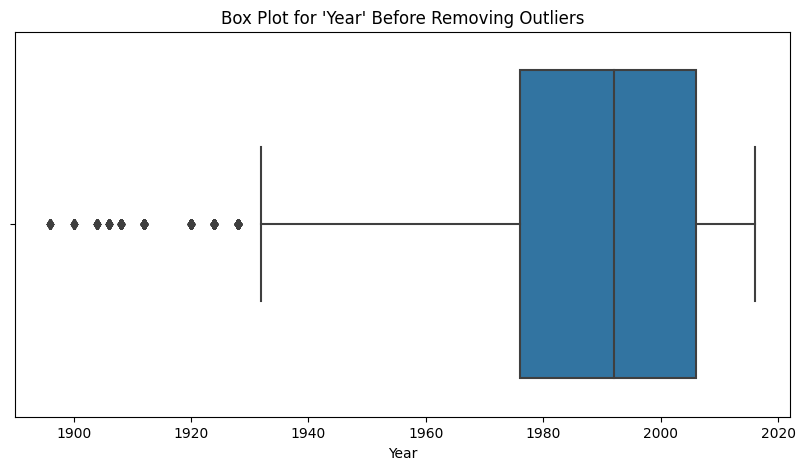

Number of rows before removing outliers for 'Year': 52266


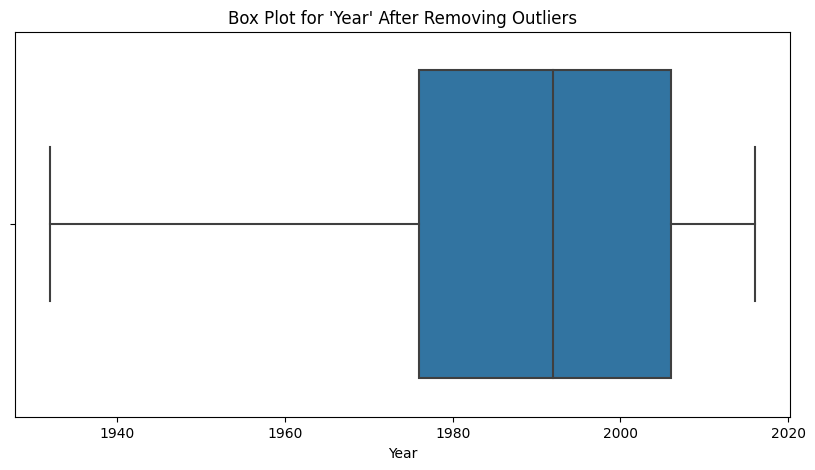

Number of rows after removing outliers for 'Year': 51521


In [10]:
def plot_boxplot(data, column, title):
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=data[column])
    plt.title(title)
    plt.show()

# Print box plot for 'Year' before removing outliers
plot_boxplot(data, 'Year', "Box Plot for 'Year' Before Removing Outliers")

# Calculate the IQR for 'Year'
Q1_year = data['Year'].quantile(0.25)
Q3_year = data['Year'].quantile(0.75)
IQR_year = Q3_year - Q1_year

# Define a function to filter outliers based on the IQR for 'Year'
def filter_outliers_year():
    lower_bound_year = Q1_year - 1.5 * IQR_year
    upper_bound_year = Q3_year + 1.5 * IQR_year
    return (data['Year'] >= lower_bound_year) & (data['Year'] <= upper_bound_year)

# Apply the filter for 'Year'
outliers_filter_year = filter_outliers_year()

# Print the number of rows before removing outliers for 'Year'
print(f"Number of rows before removing outliers for 'Year': {len(data)}")

# Remove rows with outliers for 'Year'
data = data[outliers_filter_year]

# Print box plot for 'Year' after removing outliers
plot_boxplot(data, 'Year', "Box Plot for 'Year' After Removing Outliers")

# Print the number of rows after removing outliers for 'Year'
print(f"Number of rows after removing outliers for 'Year': {len(data)}")


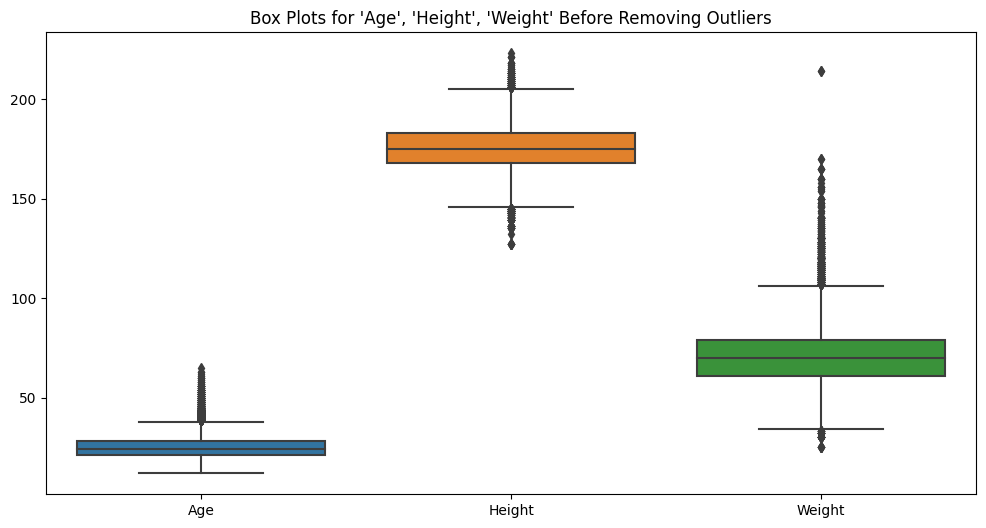

Number of rows before removing outliers for 'Age', 'Height', 'Weight': 51521


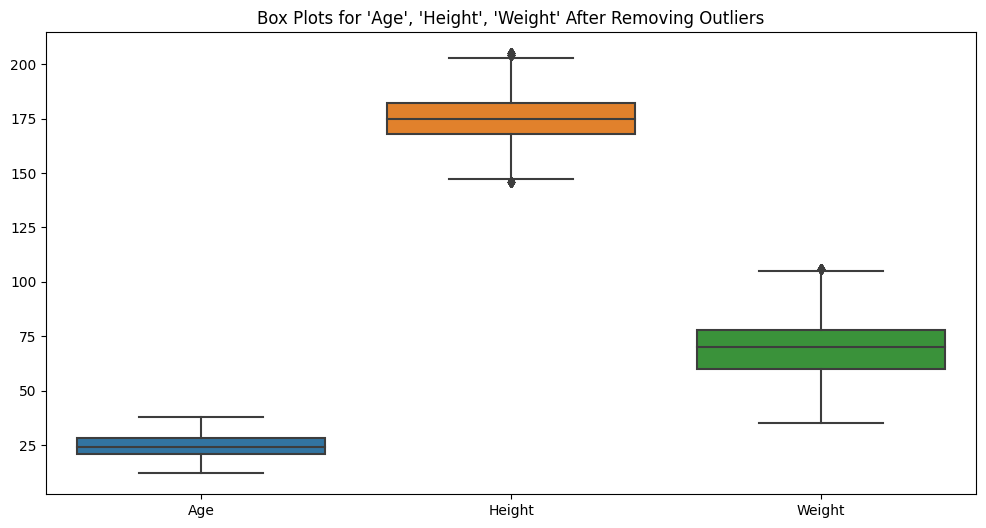

Number of rows after removing outliers for 'Age', 'Height', 'Weight': 49211


In [11]:
# Function to create box plots
def plot_boxplot(data, columns, title):
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=data[columns])
    plt.title(title)
    plt.show()

# Print box plots for 'Age', 'Height', and 'Weight' before removing outliers
plot_boxplot(data, ['Age', 'Height', 'Weight'], "Box Plots for 'Age', 'Height', 'Weight' Before Removing Outliers")

# Calculate the IQR for 'Age', 'Height', and 'Weight'
Q1_columns = data[['Age', 'Height', 'Weight']].quantile(0.25)
Q3_columns = data[['Age', 'Height', 'Weight']].quantile(0.75)
IQR_columns = Q3_columns - Q1_columns

# Define a function to filter outliers based on the IQR for 'Age', 'Height', and 'Weight'
def filter_outliers_columns():
    lower_bound_columns = Q1_columns - 1.5 * IQR_columns
    upper_bound_columns = Q3_columns + 1.5 * IQR_columns
    return (
        (data['Age'] >= lower_bound_columns['Age']) & (data['Age'] <= upper_bound_columns['Age']) &
        (data['Height'] >= lower_bound_columns['Height']) & (data['Height'] <= upper_bound_columns['Height']) &
        (data['Weight'] >= lower_bound_columns['Weight']) & (data['Weight'] <= upper_bound_columns['Weight'])
    )

# Apply the filter for 'Age', 'Height', and 'Weight'
outliers_filter_columns = filter_outliers_columns()

# Print the number of rows before removing outliers for 'Age', 'Height', and 'Weight'
print(f"Number of rows before removing outliers for 'Age', 'Height', 'Weight': {len(data)}")

# Remove rows with outliers for 'Age', 'Height', and 'Weight'
data = data[outliers_filter_columns]

# Print box plots for 'Age', 'Height', and 'Weight' after removing outliers
plot_boxplot(data, ['Age', 'Height', 'Weight'], "Box Plots for 'Age', 'Height', 'Weight' After Removing Outliers")

# Print the number of rows after removing outliers for 'Age', 'Height', and 'Weight'
print(f"Number of rows after removing outliers for 'Age', 'Height', 'Weight': {len(data)}")


**Exploratory Data Analysis (EDA)**

 Statistical summary

In [12]:
# Additional information
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49211 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    49211 non-null  object 
 1   Sex     49211 non-null  object 
 2   Age     49211 non-null  float64
 3   Height  49211 non-null  float64
 4   Weight  49211 non-null  float64
 5   Team    49211 non-null  object 
 6   NOC     49211 non-null  object 
 7   Games   49211 non-null  object 
 8   Year    49211 non-null  int64  
 9   Season  49211 non-null  object 
 10  City    49211 non-null  object 
 11  Sport   49211 non-null  object 
 12  Event   49211 non-null  object 
 13  Medal   49211 non-null  object 
dtypes: float64(3), int64(1), object(10)
memory usage: 5.6+ MB


In [13]:
# Value counts
value_counts = data['Medal'].value_counts()
print("Value counts for 'Medal':")
print(value_counts)

Value counts for 'Medal':
No Medal    42681
Gold         2230
Bronze       2173
Silver       2127
Name: Medal, dtype: int64


In [14]:
# Statistical summary using describe()
summary = data[['Year', 'Age', 'Height', 'Weight']].describe()
print(summary)

               Year           Age        Height        Weight
count  49211.000000  49211.000000  49211.000000  49211.000000
mean    1990.651602     24.593688    175.351588     70.019691
std       18.070465      4.703656     10.080288     12.650303
min     1932.000000     12.000000    146.000000     35.000000
25%     1976.000000     21.000000    168.000000     60.000000
50%     1992.000000     24.000000    175.000000     70.000000
75%     2006.000000     28.000000    182.000000     78.000000
max     2016.000000     38.000000    205.000000    106.000000


visualization using histograms, box plots, scatter plots, and a pair plot

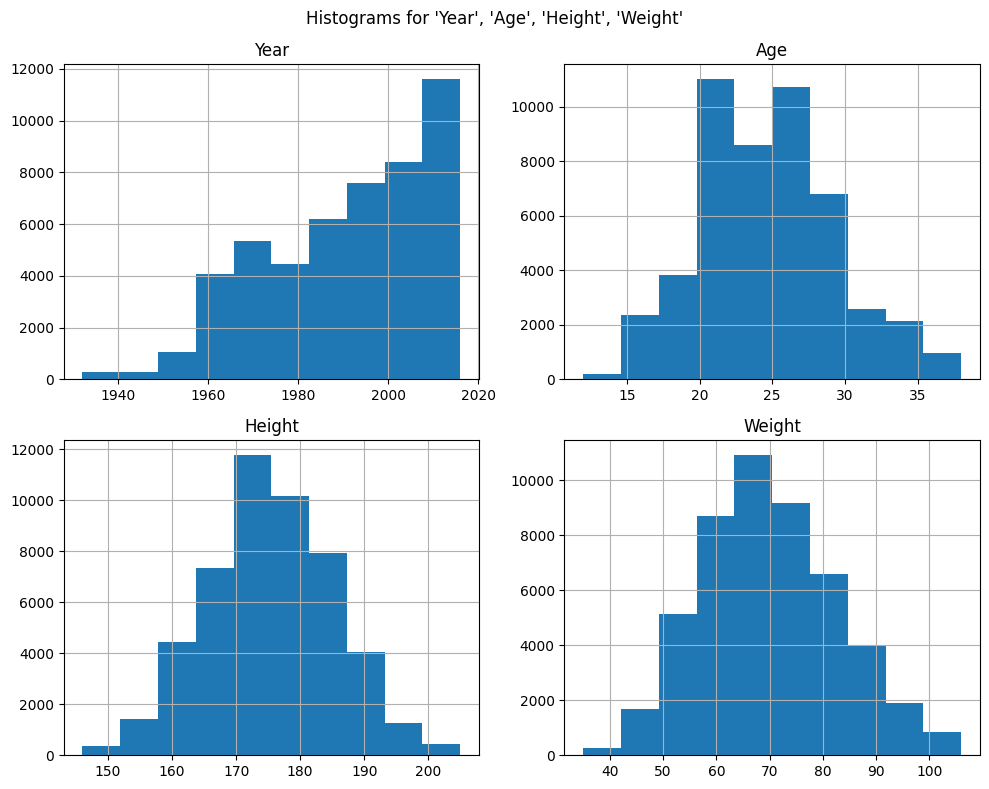

In [15]:
# Visualize data using histograms
data[['Year', 'Age', 'Height', 'Weight']].hist(figsize=(10, 8))
plt.suptitle("Histograms for 'Year', 'Age', 'Height', 'Weight'")
plt.tight_layout()
plt.show()

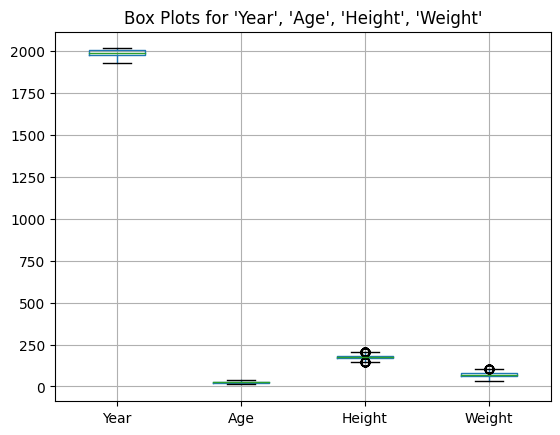

In [16]:
# Visualize data using box plots
data[['Year', 'Age', 'Height', 'Weight']].boxplot()
plt.title("Box Plots for 'Year', 'Age', 'Height', 'Weight'")
plt.show()

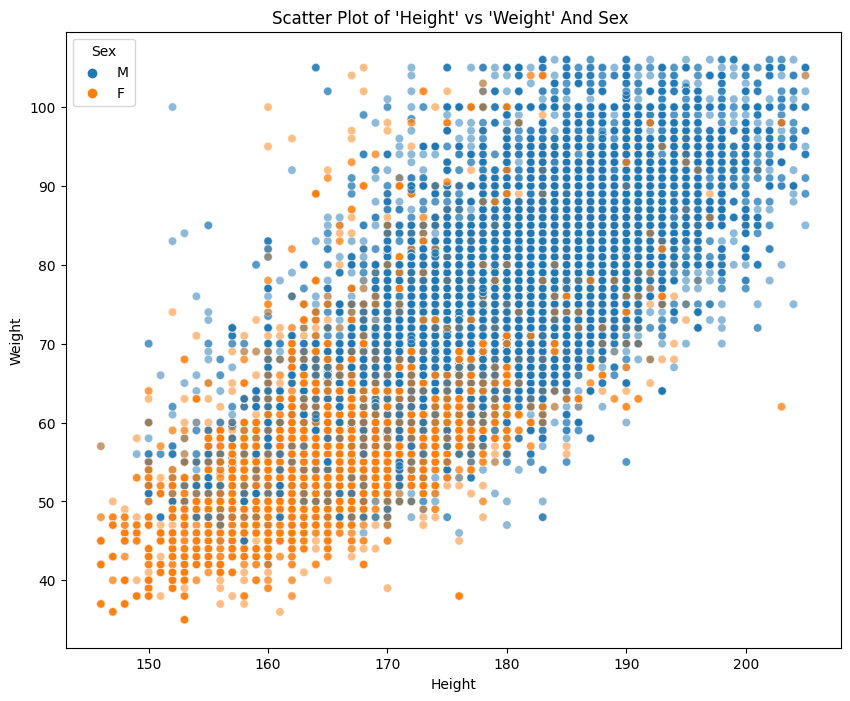

In [17]:
# Visualize data using scatter plots
# Assuming 'data' is a pandas DataFrame with the columns 'Height', 'Weight', and 'Sex'.
plt.figure(figsize=(10, 8))
sns.scatterplot(data=data, x='Height', y='Weight', hue='Sex', alpha=0.5)
plt.title("Scatter Plot of 'Height' vs 'Weight' And Sex ")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.legend(title='Sex')  # Add a legend to differentiate colors
plt.show()

<Figure size 3000x3000 with 0 Axes>

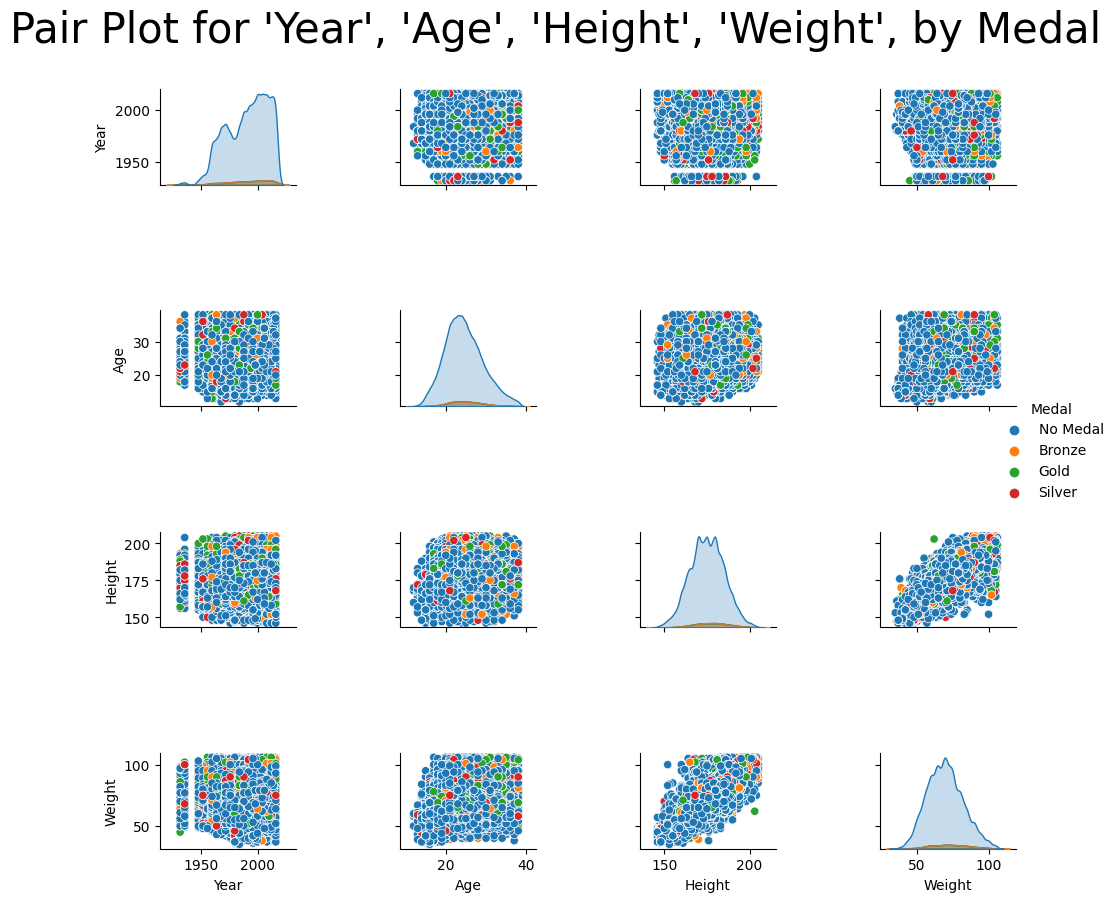

In [18]:
# Visualize data using pair plot

import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size before creating the pairplot
plt.figure(figsize=(30, 30))

# Create the pair plot
pair_plot = sns.pairplot(data[['Year', 'Age', 'Height', 'Weight', 'Medal']], hue='Medal')

# Set the title for the pair plot
pair_plot.fig.suptitle("Pair Plot for 'Year', 'Age', 'Height', 'Weight', by Medal", size=30)

# Adjust the layout with more padding and a higher top margin
plt.tight_layout(pad=7.0)
plt.subplots_adjust(top=0.9)  # You might need to adjust this value

# Show the plot
plt.show()

**Trend** **Analysis**

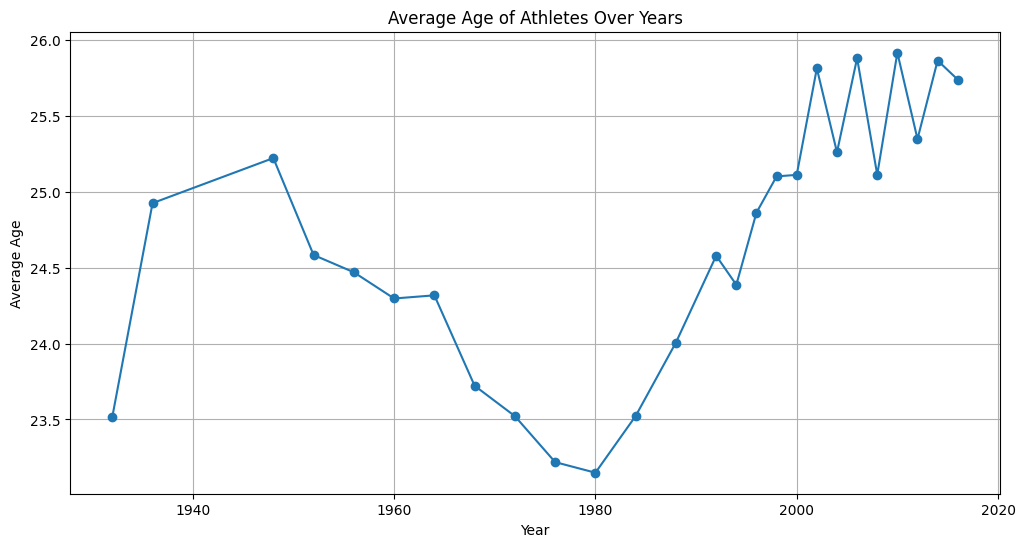

In [19]:
# Convert 'Year' to datetime format if it's not already
data['Year'] = pd.to_datetime(data['Year'], format='%Y')

# Group the data by 'Year' and calculate the mean age
age_trend = data.groupby(data['Year'].dt.year)['Age'].mean()

# Plot the trend
plt.figure(figsize=(12, 6))
plt.plot(age_trend.index, age_trend.values, marker='o')  # Added a marker for each data point
plt.title('Average Age of Athletes Over Years')
plt.xlabel('Year')
plt.ylabel('Average Age')
plt.grid(True)
plt.show()

**Segmentation**

mean values for age, height, and weight, segregated by sex.

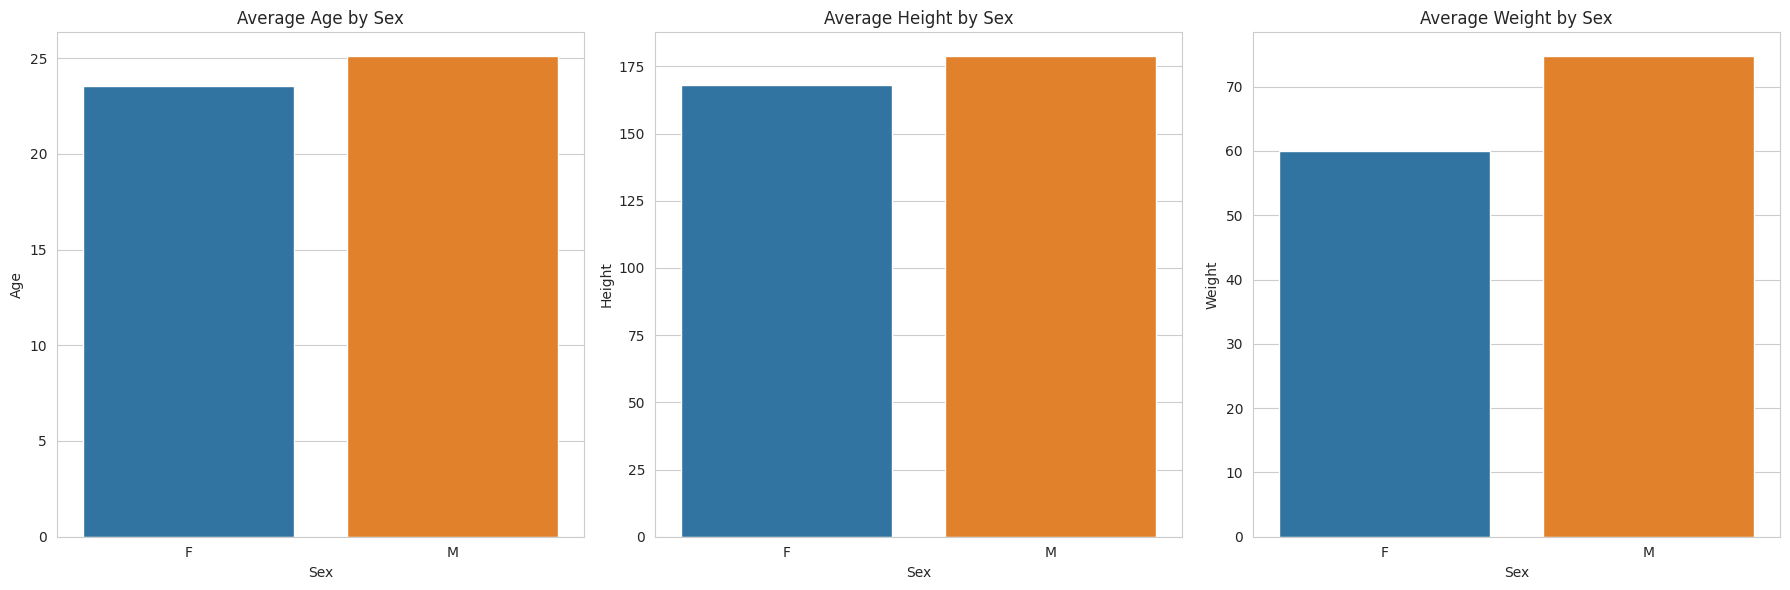

In [20]:
# Group by 'Sex' and calculate mean for 'Age', 'Height', and 'Weight'
segmented_data = data.groupby('Sex')[['Age', 'Height', 'Weight']].mean()

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Initialize the matplotlib figure
f, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True)

# Create a barplot for 'Age'
sns.barplot(x=segmented_data.index, y='Age', data=segmented_data, ax=axes[0])
axes[0].set_title('Average Age by Sex')

# Create a barplot for 'Height'
sns.barplot(x=segmented_data.index, y='Height', data=segmented_data, ax=axes[1])
axes[1].set_title('Average Height by Sex')

# Create a barplot for 'Weight'
sns.barplot(x=segmented_data.index, y='Weight', data=segmented_data, ax=axes[2])
axes[2].set_title('Average Weight by Sex')

# Finalize the plot
plt.tight_layout()
plt.show()

Count the types of medals that were won in the sport.

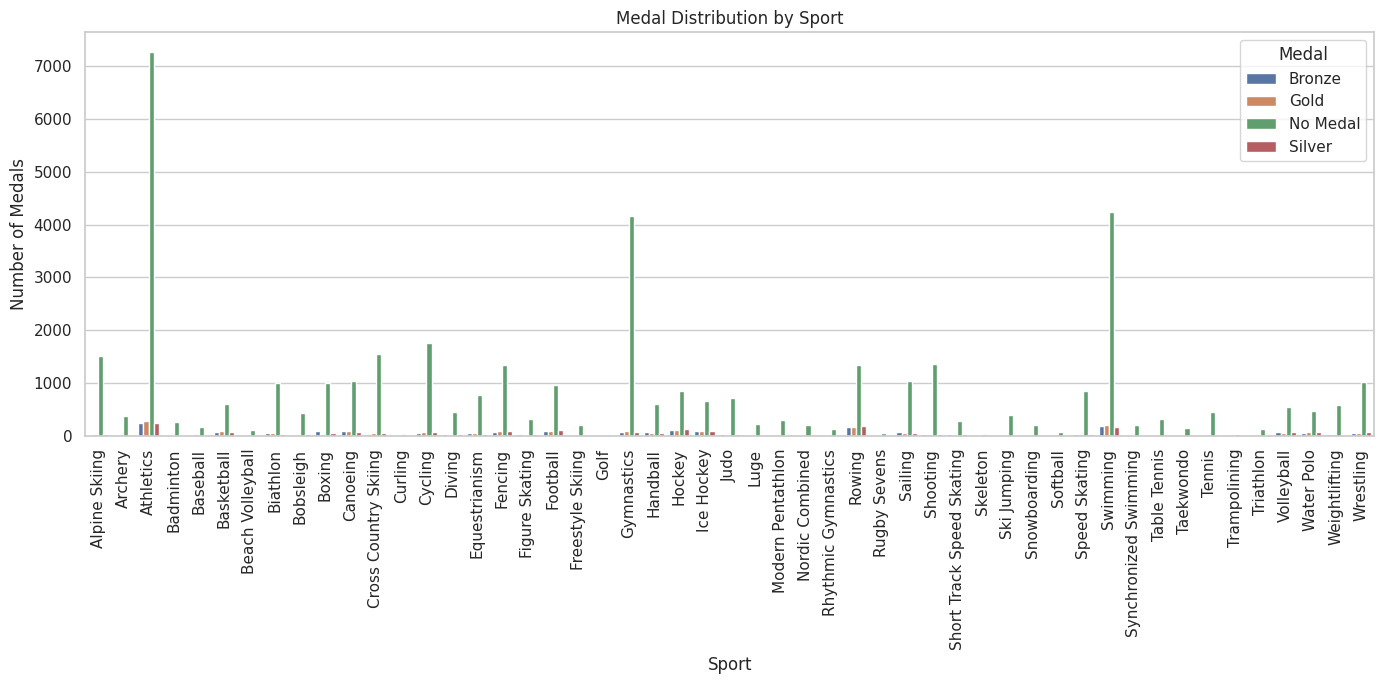

In [21]:
# Group by 'Sport' and count how many medals of each type were won
medal_distribution = data.groupby(['Sport', 'Medal']).size().unstack(fill_value=0)

# Set the aesthetics for the plot
sns.set(style="whitegrid")

# Create a figure and a set of subplots
plt.figure(figsize=(14, 7))

# Convert the "medal_distribution" dataframe into "long-form" for seaborn
medal_distribution_long = medal_distribution.reset_index().melt(id_vars='Sport', var_name='Medal', value_name='Count')

# Create a barplot
sns.barplot(x='Sport', y='Count', hue='Medal', data=medal_distribution_long)

plt.title('Medal Distribution by Sport')
plt.xlabel('Sport')
plt.ylabel('Number of Medals')
plt.xticks(rotation=90)  # Rotate the x labels so they don't overlap
plt.legend(title='Medal')
plt.tight_layout()  # Adjust the layout to make room for the x-axis labels
plt.show()

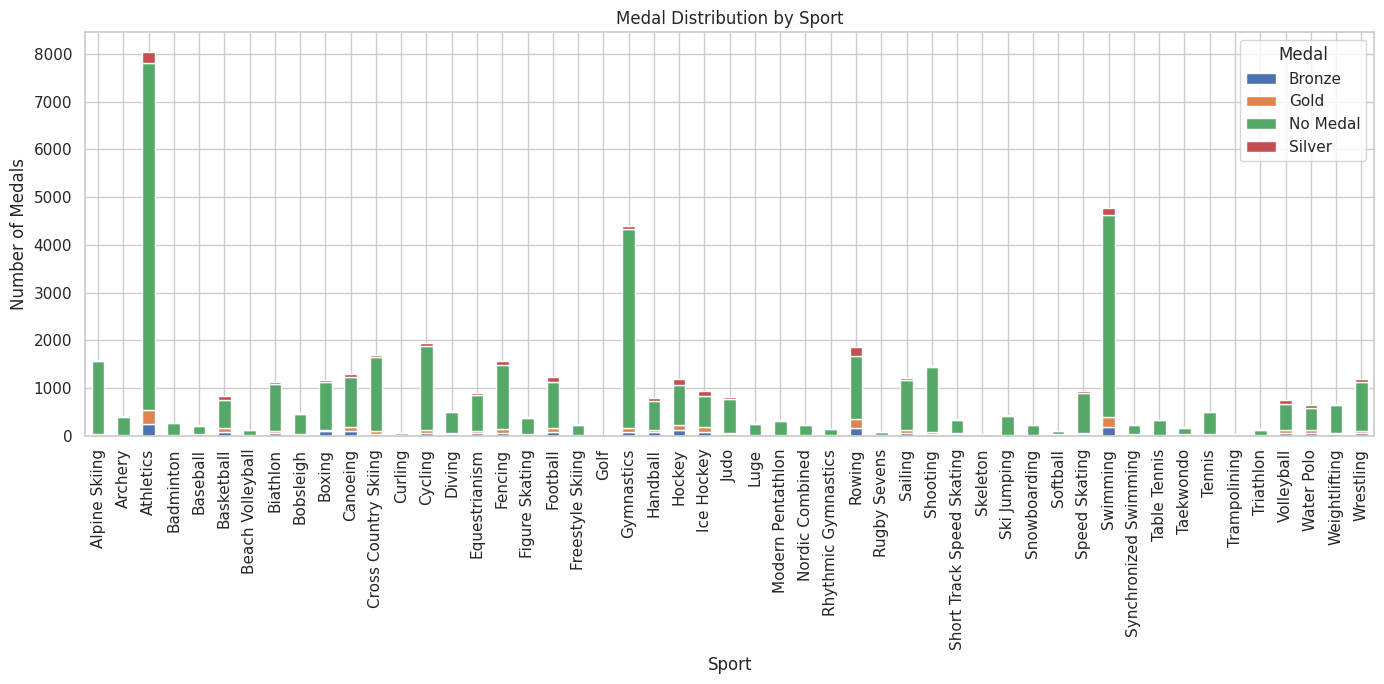

In [22]:
# Make sure that 'Sport' is a category if you had not done this before
data['Sport'] = data['Sport'].astype('category')

# Now perform the groupby operation and unstack
medal_distribution = data.groupby(['Sport', 'Medal']).size().unstack(fill_value=0)

# Reset index to make 'Sport' a column again
medal_distribution = medal_distribution.reset_index()

# Now plot with Matplotlib
import matplotlib.pyplot as plt

medal_distribution.plot(kind='bar', stacked=True, figsize=(14, 7), x='Sport')

plt.title('Medal Distribution by Sport')
plt.xlabel('Sport')
plt.ylabel('Number of Medals')
plt.xticks(rotation=90)  # Rotate the x labels so they don't overlap
plt.legend(title='Medal')

plt.tight_layout()  # Adjust the layout to make room for the x-axis labels
plt.show()

The number of medals compared by sex

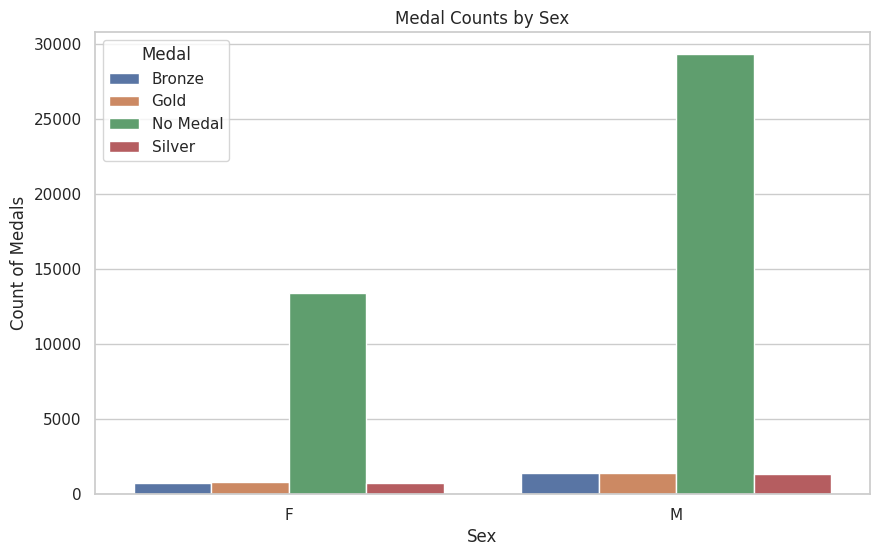

In [23]:
# Assuming 'data' is your DataFrame
medals_by_sex = data.groupby(['Sex', 'Medal']).size().reset_index(name='Count')

# Create a barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Sex', y='Count', hue='Medal', data=medals_by_sex)

plt.title('Medal Counts by Sex')
plt.xlabel('Sex')
plt.ylabel('Count of Medals')
plt.legend(title='Medal')
plt.show()

# Interactive Plots

In [24]:
!pip install plotly
import plotly.express as px

def plot_boxplot_interactive(data, columns, title):
    fig = px.box(data, y=columns, title=title)
    fig.show()
plot_boxplot_interactive(data, ['Age', 'Height', 'Weight'], "Box Plots for 'Age', 'Height', 'Weight' Before Removing Outliers")

In [25]:
fig = px.histogram(data, x="Age", color="Sex", hover_data=data.columns)
fig.show()

In [26]:
import plotly.express as px

# Assuming your DataFrame is named 'data'
fig = px.scatter(data, x='Height', y='Weight', color='Age', title='Interactive Scatter Plot for Height, Weight, and Age')
fig.show()

In [27]:
import plotly.express as px

# Assuming your DataFrame is named 'data'
fig = px.scatter_3d(data, x='Height', y='Weight', z='Age', color='Age', title='3D Scatter Plot for Height, Weight, and Age')
fig.show()

In [28]:
team_medal_counts = data.groupby(['Team', 'Medal']).size().reset_index(name='Count')

fig = px.bar(team_medal_counts, x='Team', y='Count', color='Medal',
             title='Medals by Team', labels={'Team': 'Team Name', 'Count': 'Medal Count'})
fig.show()

In [29]:
!pip install dash

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 30.9 MB/s eta 0:00:00


In [30]:
import dash
from dash import dcc, html
import plotly.express as px
import pandas as pd

# Assuming your DataFrame is named 'data' and the columns for Team, Medal, and Games are 'Team', 'Medal', and 'Games' respectively
team_medal_games = data.groupby(['Team', 'Medal', 'Games']).size().reset_index(name='Count')

app = dash.Dash(__name__)

app.layout = html.Div([
    dcc.Graph(
        figure=px.scatter(team_medal_games, x='Team', y='Games', color='Medal',
                          size='Count', hover_name='Team',
                          labels={'Team': 'Team Name', 'Games': 'Games Played'},
                          title='Medals by Team and Games')
    )
])

if __name__ == '__main__':
    app.run_server(debug=True)

<IPython.core.display.Javascript object>

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
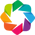

:Scatter   [Height,Weight]   (Age)

In [31]:
import pandas as pd
import holoviews as hv
from holoviews import opts

# Initialize the holoviews extension
hv.extension('bokeh')

# Assuming 'data' is your DataFrame
scatter = hv.Scatter(data, ['Height', 'Weight'], 'Age')

# Customize the plot if needed
scatter.opts(
    opts.Scatter(color='Age', cmap='viridis', width=600, height=400, tools=['hover'],
                 xlabel='Height', ylabel='Weight', title='Interactive Scatter Plot: Height vs Weight by Age')
).redim.range(Height=(data['Height'].min(), data['Height'].max()),
              Weight=(data['Weight'].min(), data['Weight'].max()))

In [32]:
data_sorted = data.sort_values('Year')
team_medals_won_counts = data_sorted.groupby(['Team', 'Medal', data_sorted['Year'].dt.year]).size().reset_index(name='Count')
pd.to_datetime(team_medals_won_counts['Year'],errors='ignore')
team_medals_won_counts = team_medals_won_counts[team_medals_won_counts['Medal'] != 'No Medal']
team_medals_won_counts

Team   Medal  Year  Count
17      Algeria  Bronze  1996      1
18      Algeria  Bronze  2000      1
19      Algeria    Gold  1992      1
32      Algeria  Silver  2008      1
68    Aphrodite  Bronze  1964      1
...         ...     ...   ...    ...
4576   Zimbabwe    Gold  1980      5
4577   Zimbabwe    Gold  2004      1
4578   Zimbabwe    Gold  2008      1
4591   Zimbabwe  Silver  2004      1
4592   Zimbabwe  Silver  2008      3

[1670 rows x 4 columns]

In [33]:

fig = px.scatter_geo(team_medals_won_counts, locations="Team", locationmode='country names',
                     size="Count", color="Medal", animation_frame="Year", projection="natural earth")

fig.update_geos(showcountries=True)

fig.show()